# Class comparison

## Setup

In [1]:
import util.local_config as local_config
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from util.helper_functions.classification_report_output_processon import print_classification_report

In [2]:
# Get the ground truth labels
ground_truth_labels = local_config.GROUND_TRUTH_LABELS

# Get the speech and text model results dataframes
speech_model_results = local_config.SPEECH_MODEL_RESULTS
text_model_results = local_config.TEXT_MODEL_RESULTS

# Merge the ground truth labels with the speech model results
speech_model_results = pd.merge(speech_model_results, ground_truth_labels, on=['dialogue_id', 'utterance_id'])

# Merge the ground truth labels with the text model results
text_model_results = pd.merge(text_model_results, ground_truth_labels, on=['dialogue_id', 'utterance_id'])

## Main

### Confusion matrices

In [3]:
# Calculate the confusion matrix for the text model
text_confusion_matrix = confusion_matrix(text_model_results['ground_truth_emotion_one_hot_index'], text_model_results['model_prediction'])

# Calculate the confusion matrix for the speech model
speech_confusion_matrix = confusion_matrix(speech_model_results['ground_truth_emotion_one_hot_index'], speech_model_results['model_prediction'])

#### Text model confusion matrix

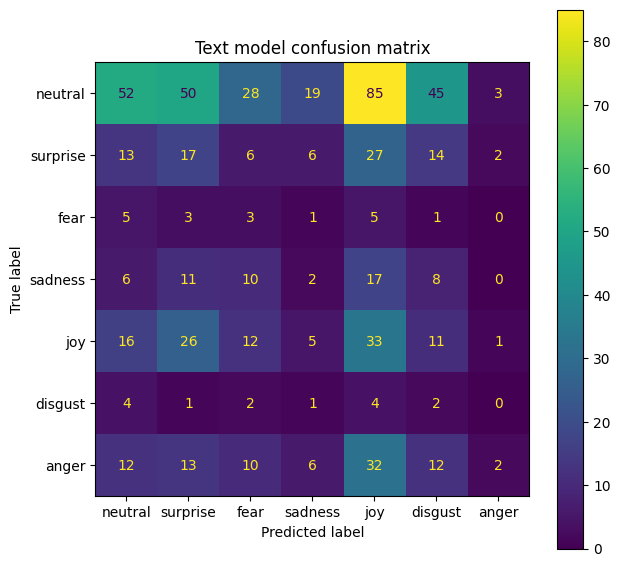

In [4]:
# Set the figure
fig, ax = plt.subplots(figsize=(7, 7))

# Set the title
ax.set_title('Text model confusion matrix')

# Set the axis labels
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

# Show the confusion matrix
ConfusionMatrixDisplay(
    confusion_matrix=text_confusion_matrix, 
    display_labels=local_config.EMOTION_LABELS_STRINGS
).plot(ax=ax)

plt.show()

#### Speech model confusion matrix

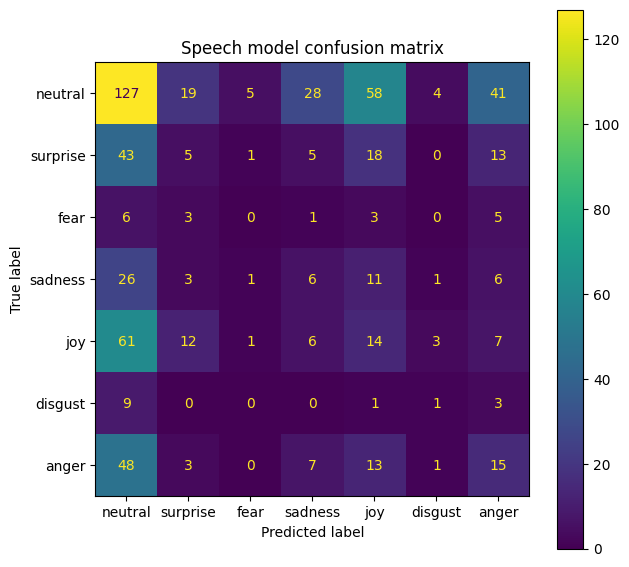

In [5]:
# Set the figure
fig, ax = plt.subplots(figsize=(7, 7))

# Set the title
ax.set_title('Speech model confusion matrix')

# Set the axis labels
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

# Show the confusion matrix
ConfusionMatrixDisplay(
    confusion_matrix=speech_confusion_matrix, 
    display_labels=local_config.EMOTION_LABELS_STRINGS
).plot(ax=ax)

plt.show()

### Classification reports

#### Text model

In [6]:
text_classification_report = classification_report(
    y_true=text_model_results['ground_truth_emotion_one_hot_index'], 
    y_pred=text_model_results['model_prediction'], 
    target_names=local_config.EMOTION_LABELS_STRINGS, 
    output_dict=True,
    zero_division=0
)

In [7]:
# Print the classification report
print_classification_report(text_classification_report)

Neutral
------------------------------------
precision: 0.48148148148148145
recall: 0.18439716312056736
f1-score: 0.26666666666666666
support: 282

Surprise:
------------------------------------
precision: 0.14049586776859505
recall: 0.2
f1-score: 0.16504854368932037
support: 85

Fear:
------------------------------------
precision: 0.04225352112676056
recall: 0.16666666666666666
f1-score: 0.06741573033707865
support: 18

Sadness:
------------------------------------
precision: 0.05
recall: 0.037037037037037035
f1-score: 0.0425531914893617
support: 54

Joy:
------------------------------------
precision: 0.1625615763546798
recall: 0.3173076923076923
f1-score: 0.21498371335504884
support: 104

Disgust:
------------------------------------
precision: 0.021505376344086023
recall: 0.14285714285714285
f1-score: 0.037383177570093455
support: 14

Anger:
------------------------------------
precision: 0.25
recall: 0.022988505747126436
f1-score: 0.04210526315789474
support: 87



#### Speech model

In [8]:
speech_classification_report = classification_report(
    y_true=speech_model_results['ground_truth_emotion_one_hot_index'], 
    y_pred=speech_model_results['model_prediction'], 
    target_names=local_config.EMOTION_LABELS_STRINGS, 
    output_dict=True,
    zero_division=0
)

In [9]:
# Print the classification report
print_classification_report(speech_classification_report)

Neutral
------------------------------------
precision: 0.396875
recall: 0.450354609929078
f1-score: 0.42192691029900337
support: 282

Surprise:
------------------------------------
precision: 0.1111111111111111
recall: 0.058823529411764705
f1-score: 0.07692307692307691
support: 85

Fear:
------------------------------------
precision: 0.0
recall: 0.0
f1-score: 0.0
support: 18

Sadness:
------------------------------------
precision: 0.11320754716981132
recall: 0.1111111111111111
f1-score: 0.11214953271028037
support: 54

Joy:
------------------------------------
precision: 0.11864406779661017
recall: 0.1346153846153846
f1-score: 0.12612612612612614
support: 104

Disgust:
------------------------------------
precision: 0.1
recall: 0.07142857142857142
f1-score: 0.08333333333333333
support: 14

Anger:
------------------------------------
precision: 0.16666666666666666
recall: 0.1724137931034483
f1-score: 0.16949152542372883
support: 87

